In [1]:
#Importamos las carpetas que vamos a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [2]:
#Leemos los archivos con los daos que vamos a utilizar en el trabajo.
df0 = pd.read_csv ('meteo-nogal-09.csv', engine='python')
df00 = pd.read_csv ('soil-nogal-09.csv', engine='python')

In [3]:
#Creamos los Dataframe con los datos de los archivos.
Clima= pd.DataFrame(df0)
Suelo= pd.DataFrame(df00)

In [4]:
#Ahora eliminaremos los datos que no vamos a utilizar de los Dataframes.
Clima.drop(Clima.columns[18:36],axis=1,inplace=True) 
Clima.drop(Clima.columns[2:4],axis=1,inplace=True)
Clima=Clima.drop(index=0)
Clima=Clima.reset_index(drop=True)

#Duespues, realizamos algunos otros ajustes, como juntarlas columnas de fecha y tiempo, quitamos los datos que no 
#vamos a utilizar de las columnas y por ultimo convertimos la fecha en otro dataframe para utilizarlo despues.
Clima['Fecha']= Clima['DATE'] + ' ' + Clima['TIME']
Clima.drop(['DATE', 'TIME'],axis=1,inplace=True)
Clima['Fecha'] = pd.to_datetime(Clima['Fecha'])
Clima[Clima.columns[0:14]]=Clima[Clima.columns[0:14]].apply(pd.to_numeric, errors='coerce')
Clima= Clima.drop(Clima.index[Clima['Fecha'] >='2010-01-01'])
Clima.head(), Clima.tail()

(   u_Avg  v_Avg  w_Avg  t_Avg  kh20_Avg  net_rad_Avg  shf1_Avg  shf2_Avg  \
 0  1.215  0.506 -0.044  10.95     1.159       -176.5     23.58    -26.72   
 1  0.892  0.588 -0.072  10.81     1.159       -176.6     23.73    -26.76   
 2  1.227  0.685 -0.069  10.34     1.224       -175.5     23.61    -26.46   
 3  1.135  0.741 -0.093   9.80     1.258       -182.7     23.41    -26.46   
 4  0.755  1.064 -0.149   8.87     1.332       -184.8     23.22    -26.39   
 
    vv_Avg  airT_Avg  rh_Avg  e_sat_Avg  e_Avg  h2o_hmp_Avg               Fecha  
 0   1.327  9.400000   0.899      1.178  1.059     8.120000 2009-01-01 00:10:00  
 1   1.079  9.240000   0.896      1.166  1.045     8.020000 2009-01-01 00:20:00  
 2   1.421  9.059999   0.896      1.152  1.032     7.926001 2009-01-01 00:30:00  
 3   1.384  9.059999   0.874      1.152  1.008     7.737000 2009-01-01 00:40:00  
 4   1.359  8.630000   0.859      1.119  0.961     7.390000 2009-01-01 00:50:00  ,
        u_Avg  v_Avg  w_Avg   t_Avg  kh20_A

In [7]:
#Ahora, crearemos un nuevo DataFrame temporal para la fecha con los datos del Suelo.
#y renombramos las variables.
temp=Suelo.filter(items=["2 Year_RTM  L","3 Day_RTM  L", "4 Hour_Minute_RTM  L"],axis=1)
temp.rename(columns={"2 Year_RTM  L":"Año","3 Day_RTM  L":"Dia", "4 Hour_Minute_RTM  L":"Hora"},inplace=True)

In [8]:
#Crearemos un loop es para cambiar el dato del dia que corresponde a la hora 2400 para que coincida con
#la fecha del DataFrame, donde le daremos el valor de 1 al dia correspondiente a la hora 2400.
r=len(Suelo)-1
for i in range (0,r):
    if(temp['Hora'][i] == 2400):
        temp['Dia'][i]=temp['Dia'][i+1]

In [9]:
# Modificamos los datos de la columna hora para darle el formato necesario y poder cambiarlo a tipo fecha.
temp['Hora']=temp['Hora'].astype(str).replace(regex={r'30$':r':30',r'00$':r':00',r'^:30':r'0:30',r'24:00':r'00:00'})

# Cambiamos al tipo Datetime la columna de Año con el formato de año 
temp['Año']=pd.to_datetime(temp['Año'].astype(str), format='%Y') 
# Cambiamos al tipo Datetime la columna de Dia con el formato de dia julinao
temp['Dia']=pd.to_datetime(temp['Dia'].astype(str), format='%j') 
# Cambiamos al tipo Datetime la columna de Hora con el formato "Hora:Minuto"
temp['Hora']=pd.to_datetime(temp['Hora'].astype(str), format='%H:%M')

#Cambiamos los datos de las columnas a sus variables correspondientes.
temp['Año']=temp['Año'].dt.year 
temp['Mes']=temp['Dia'].dt.month
temp['Dia']=temp['Dia'].dt.day
temp['Min']=temp['Hora'].dt.minute
temp['Hora']=temp['Hora'].dt.hour

In [10]:
#Unimos los datos obtenidos anteriormente en orden de Año-Mes-Dia Hora:Minuto en una sola columna.
temp['Fecha']=temp['Año'].astype(str)+' '+temp['Mes'].astype(str)+' '+temp['Dia'].astype(str)+' '+temp['Hora'].astype(str)+' '+temp['Min'].astype(str)
temp['Fecha']=pd.to_datetime(temp['Fecha'], format='%Y %m %d %H %M')
temp.drop(['Año', 'Mes','Dia','Hora','Min'],axis=1,inplace=True)
temp.head(), temp.tail()

(                Fecha
 0 2009-01-01 00:30:00
 1 2009-01-01 01:00:00
 2 2009-01-01 01:30:00
 3 2009-01-01 02:00:00
 4 2009-01-01 02:30:00,                     Fecha
 17477 2009-12-31 22:00:00
 17478 2009-12-31 22:30:00
 17479 2009-12-31 23:00:00
 17480 2009-12-31 23:30:00
 17481 2009-12-31 00:00:00)

In [11]:
#Ahora del DataFrame "Suelo" tomamos solo las columnas que vamos a utilizar y las guardamos en otro DataFrame temporal  
temp2=Suelo.filter(items=["Tsuelo_10cm","Tsuelo_20cm","Tsuelo_30cm","Tsuelo_40cm","Tsuelo_55cm","Tsuelo_70cm","Tsuelo_85cm","Tsuelo_100cm"],axis=1)
slo=pd.concat([temp,temp2],axis=1) #En un nuevo DataFrame junto ambos DataFrame temporales y lo llamo "slo"
slo.head(), slo.tail()

(                Fecha  Tsuelo_10cm  Tsuelo_20cm  Tsuelo_30cm  Tsuelo_40cm  \
 0 2009-01-01 00:30:00        14.36        14.70        15.22        15.52   
 1 2009-01-01 01:00:00        14.33        14.70        15.24        15.52   
 2 2009-01-01 01:30:00        14.28        14.69        15.24        15.54   
 3 2009-01-01 02:00:00        14.24        14.69        15.25        15.55   
 4 2009-01-01 02:30:00        14.19        14.69        15.27        15.55   
 
    Tsuelo_55cm  Tsuelo_70cm  Tsuelo_85cm  Tsuelo_100cm  
 0        16.11        17.02        17.75         18.62  
 1        16.11        17.02        17.75         18.62  
 2        16.11        17.02        17.74         18.62  
 3        16.12        17.02        17.74         18.60  
 4        16.12        17.02        17.73         18.60  ,
                     Fecha  Tsuelo_10cm  Tsuelo_20cm  Tsuelo_30cm  Tsuelo_40cm  \
 17477 2009-12-31 22:00:00        13.96        14.13        14.82        15.23   
 17478 2009-12-31

In [12]:
slo = slo.drop_duplicates(subset=['Fecha']) #Me deshago de los datos duplicados 
slo= slo.reset_index(drop=True) #Reinicio el indice

In [13]:
Clima['Min']= Clima['Fecha'].dt.minute #En el DataFrame Clima obtengo los minutos de la columna fecha.
Clima= Clima[((Clima['Min'] == 30.0) | (Clima['Min'] == 0.0) ) & (Clima['Fecha']<='2009-12-31 023:30:00')]
Clima= Clima.reset_index(drop=True) #Reinicio el inidice 
Clima.drop(['Min'],axis=1,inplace=True)

In [14]:
#En un nuevo DataFrame llamado "comb" combino ambos DataFrames, "slo" y "Clima", basandome en la columna de Fecha
comb=pd.merge(slo,Clima,on=['Fecha']) 
comb.head(), comb.tail()

(                Fecha  Tsuelo_10cm  Tsuelo_20cm  Tsuelo_30cm  Tsuelo_40cm  \
 0 2009-01-01 00:30:00        14.36        14.70        15.22        15.52   
 1 2009-01-01 01:00:00        14.33        14.70        15.24        15.52   
 2 2009-01-01 01:30:00        14.28        14.69        15.24        15.54   
 3 2009-01-01 02:00:00        14.24        14.69        15.25        15.55   
 4 2009-01-01 02:30:00        14.19        14.69        15.27        15.55   
 
    Tsuelo_55cm  Tsuelo_70cm  Tsuelo_85cm  Tsuelo_100cm  u_Avg     ...       \
 0        16.11        17.02        17.75         18.62  1.227     ...        
 1        16.11        17.02        17.75         18.62  0.885     ...        
 2        16.11        17.02        17.74         18.62  0.118     ...        
 3        16.12        17.02        17.74         18.60  0.755     ...        
 4        16.12        17.02        17.73         18.60  1.080     ...        
 
    kh20_Avg  net_rad_Avg  shf1_Avg  shf2_Avg  vv_Avg 

In [15]:
#Filtramos la combinacion con los datosque vamos a usar.
comb = comb.filter(['Fecha','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm','airT_Avg','net_rad_Avg'],axis=1)
comb.head(), comb.tail()

(                Fecha  Tsuelo_10cm  Tsuelo_20cm  Tsuelo_30cm  Tsuelo_40cm  \
 0 2009-01-01 00:30:00        14.36        14.70        15.22        15.52   
 1 2009-01-01 01:00:00        14.33        14.70        15.24        15.52   
 2 2009-01-01 01:30:00        14.28        14.69        15.24        15.54   
 3 2009-01-01 02:00:00        14.24        14.69        15.25        15.55   
 4 2009-01-01 02:30:00        14.19        14.69        15.27        15.55   
 
    Tsuelo_55cm  Tsuelo_70cm  Tsuelo_85cm  Tsuelo_100cm  airT_Avg  net_rad_Avg  
 0        16.11        17.02        17.75         18.62  9.059999       -175.5  
 1        16.11        17.02        17.75         18.62  8.340000       -183.4  
 2        16.11        17.02        17.74         18.62  7.539001       -187.8  
 3        16.12        17.02        17.74         18.60  6.760000       -174.0  
 4        16.12        17.02        17.73         18.60  7.288001       -170.7  ,
                     Fecha  Tsuelo_10cm  Ts

In [16]:
#Tal como pide la actividad, seleccionamos un dia y graficamos las temperaturas del suelo y el aire.. 
#El dia que seleccione fue el 20 de enero, para eso en un nuevo DataFrame:
comb1=comb[comb['Fecha']>='2009-01-20 00:00:00'] #Selecciono los datos donde la fecha es mayor o igual al 20 de enero a las 00:00
comb1=comb1[comb1['Fecha']< '2009-01-21 00:00:00'] #Y datos que sean menores al 21 de enero a las 00:00
comb1=comb1.reset_index(drop=True) #Reinicio el indice
len(comb1) #Al ser un solo dia y con datos tomados cada 30 min, comprobamos que la cantidad de datos sea 48

48

<Figure size 432x288 with 0 Axes>

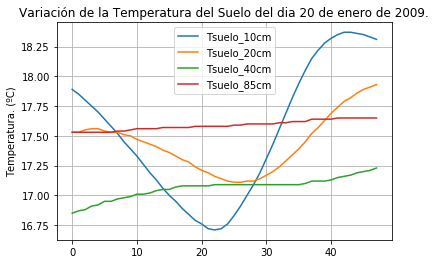

In [17]:
#Grafica de la temperatura del suelo a diferentes profundidades en un dia 20 de Enero.
graf1 = comb1[['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm','Tsuelo_85cm']]
plt.figure(); graf1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura del Suelo del dia 20 de enero de 2009.")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.savefig('Var_suelo_20_ene',plt=2000)
plt.show()

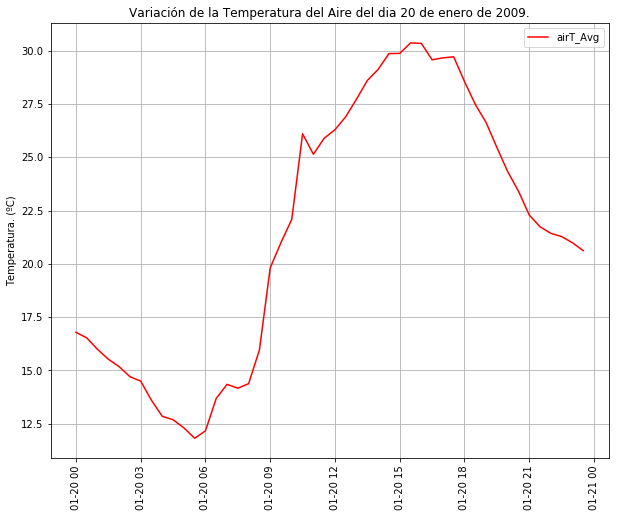

In [24]:
#Grafica de la temperatura del aire en un dia de Enero 
plt.figure(figsize=[10,8])
plt.plot_date(x=comb1.Fecha, y=comb1.airT_Avg, fmt="r-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura del Aire del dia 20 de enero de 2009.")
plt.xticks(color = 'k',rotation = 90)
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.savefig('Var_aire_20_ene',plt=2000)
plt.show()

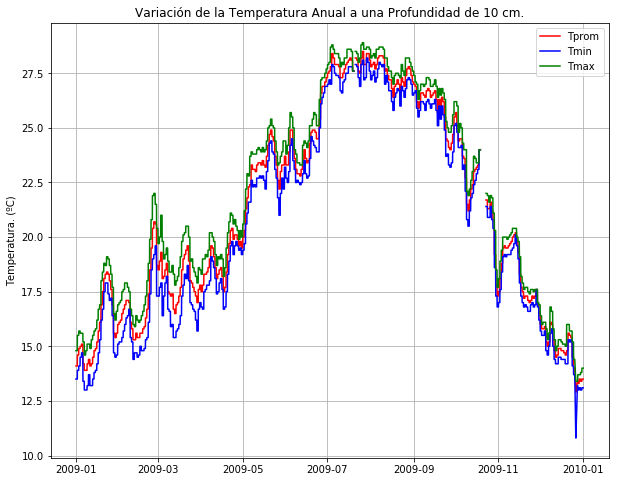

In [25]:
comb2=comb.filter(['Tsuelo_10cm','Fecha']) #Filtro las columnas a utilizar en el nuevo DataFrame
#De la columna Fecha obtengo:
comb2['Mes']=comb2['Fecha'].dt.month #El mes
comb2['Dia']=comb2['Fecha'].dt.day # El dia 
#Ahora con la funcion groupby obtengo:
comb2['Tprom']=round(comb2.groupby(['Mes','Dia'])['Tsuelo_10cm'].transform(np.mean),1) #La temperatura promedio
comb2['Tmax']=round(comb2.groupby(['Mes','Dia'])['Tsuelo_10cm'].transform(np.max),1) #La temperatura maxima
comb2['Tmin']=round(comb2.groupby(['Mes','Dia'])['Tsuelo_10cm'].transform(np.min),1) #La temperatura minima

#Grafico las diferentes temperaturas obtenidad contra el tiempo 
plt.figure(figsize=[10,8])
plt.plot_date(x=comb2.Fecha, y=comb2.Tprom, fmt="r-")
plt.plot_date(x=comb2.Fecha, y=comb2.Tmin, fmt="b-")
plt.plot_date(x=comb2.Fecha, y=comb2.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a una Profundidad de 10 cm.")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.savefig('Var_anual_10',plt=2000)
plt.show()

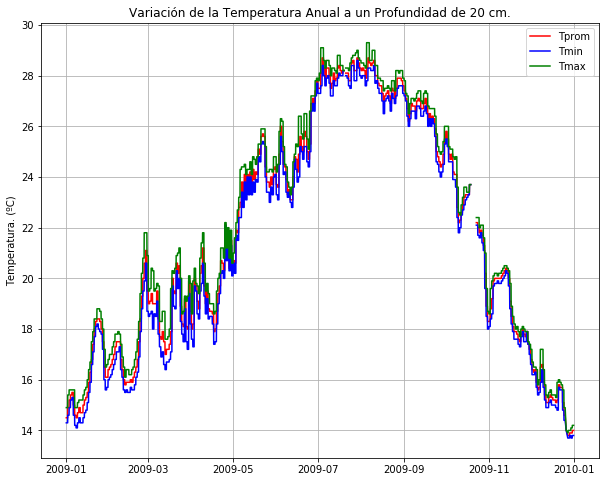

In [26]:
comb3=comb.filter(['Tsuelo_20cm','Fecha'])
comb3['Mes']=comb3['Fecha'].dt.month
comb3['Dia']=comb3['Fecha'].dt.day
comb3['Tprom']=round(comb3.groupby(['Mes','Dia'])['Tsuelo_20cm'].transform(np.mean),1)
comb3['Tmax']=round(comb3.groupby(['Mes','Dia'])['Tsuelo_20cm'].transform(np.max),1)
comb3['Tmin']=round(comb3.groupby(['Mes','Dia'])['Tsuelo_20cm'].transform(np.min),1)

#Graficamos la temperatura anual a profundidad de 20 centimetros.
plt.figure(figsize=[10,8])
plt.plot_date(x=comb3.Fecha, y=comb3.Tprom, fmt="r-")
plt.plot_date(x=comb3.Fecha, y=comb3.Tmin, fmt="b-")
plt.plot_date(x=comb3.Fecha, y=comb3.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a un Profundidad de 20 cm.")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.savefig('Var_anual_20',plt=2000)
plt.show()

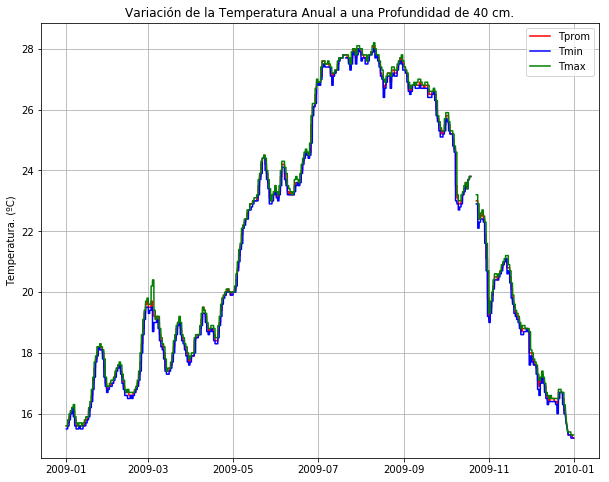

In [27]:
comb4=comb.filter(['Tsuelo_40cm','Fecha'])
comb4['Mes']=comb4['Fecha'].dt.month
comb4['Dia']=comb4['Fecha'].dt.day
comb4['Tprom']=round(comb4.groupby(['Mes','Dia'])['Tsuelo_40cm'].transform(np.mean),1)
comb4['Tmax']=round(comb4.groupby(['Mes','Dia'])['Tsuelo_40cm'].transform(np.max),1)
comb4['Tmin']=round(comb4.groupby(['Mes','Dia'])['Tsuelo_40cm'].transform(np.min),1)

#Graficamos la temperatura anual a profundidad de 40 centimetros.
plt.figure(figsize=[10,8])
plt.plot_date(x=comb4.Fecha, y=comb4.Tprom, fmt="r-")
plt.plot_date(x=comb4.Fecha, y=comb4.Tmin, fmt="b-")
plt.plot_date(x=comb4.Fecha, y=comb4.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a una Profundidad de 40 cm.")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.savefig('Var_anual_40',plt=2000)
plt.show()

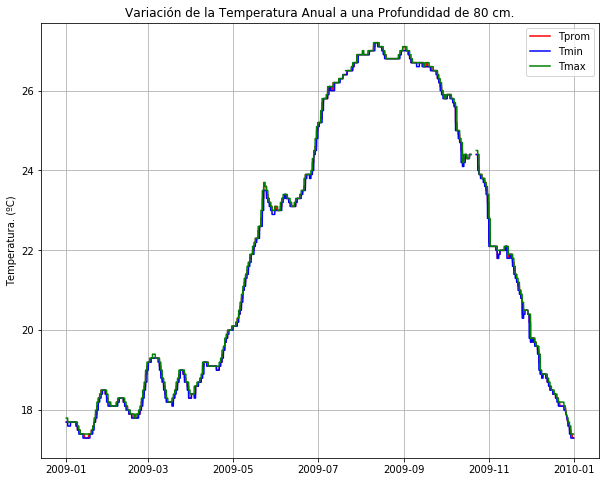

In [28]:
comb5=comb.filter(['Tsuelo_85cm','Fecha'])
comb5['Mes']=comb5['Fecha'].dt.month
comb5['Dia']=comb5['Fecha'].dt.day
comb5['Tprom']=round(comb5.groupby(['Mes','Dia'])['Tsuelo_85cm'].transform(np.mean),1)
comb5['Tmax']=round(comb5.groupby(['Mes','Dia'])['Tsuelo_85cm'].transform(np.max),1)
comb5['Tmin']=round(comb5.groupby(['Mes','Dia'])['Tsuelo_85cm'].transform(np.min),1)

plt.figure(figsize=[10,8])
plt.plot_date(x=comb5.Fecha, y=comb5.Tprom, fmt="r-")
plt.plot_date(x=comb5.Fecha, y=comb5.Tmin, fmt="b-")
plt.plot_date(x=comb5.Fecha, y=comb5.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a una Profundidad de 80 cm.")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.savefig('Var_anual_80',plt=2000)
plt.show()

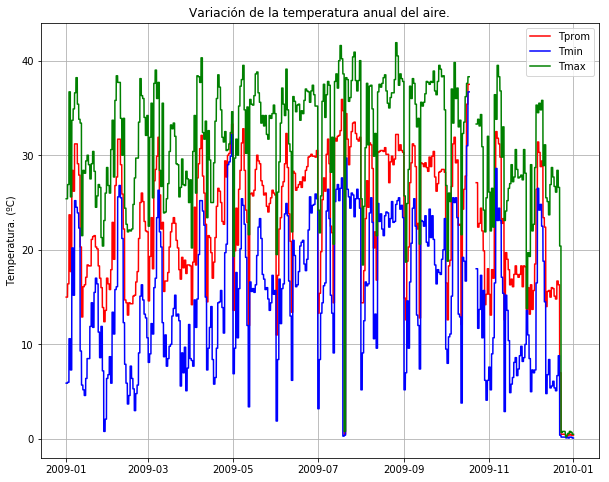

In [29]:
comb6=comb.filter(['airT_Avg','Fecha'])
comb6['Mes']=comb6['Fecha'].dt.month
comb6['Dia']=comb6['Fecha'].dt.day
comb6['Tprom']=round(comb6.groupby(['Mes','Dia'])['airT_Avg'].transform(np.mean),1)
comb6['Tmax']=round(comb6.groupby(['Mes','Dia'])['airT_Avg'].transform(np.max),1)
comb6['Tmin']=round(comb6.groupby(['Mes','Dia'])['airT_Avg'].transform(np.min),1)

plt.figure(figsize=[10,8])
plt.plot_date(x=comb6.Fecha, y=comb6.Tprom, fmt="r-")
plt.plot_date(x=comb6.Fecha, y=comb6.Tmin, fmt="b-")
plt.plot_date(x=comb6.Fecha, y=comb6.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la temperatura anual del aire.")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.savefig('Var_aire_anual',plt=2000)
plt.show()

In [30]:
#Otro de los puntos es graficar las temperaturas cada 30 minutos durante el mes de enero
#Para esto creo otro DataFrame que contenga solo datos de enero llamado "ult"
ult=comb[comb['Fecha']< '2009-02-01 00:00:00']
ult=ult.reset_index(drop=True)

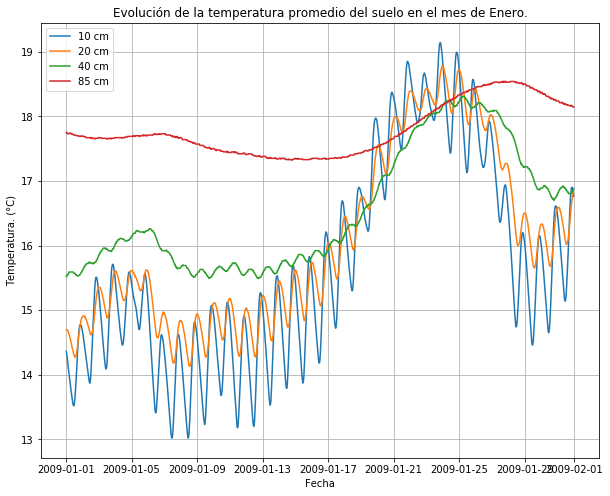

In [31]:
#Grafica para las temperaturas del suelo a diferentes profundidades
plt.figure(figsize=[10,8])
x=ult['Fecha'] #En el eje de las x etsra la fecha
y1=ult['Tsuelo_10cm'] #temperatura del suelo a 10 cm
y2=ult['Tsuelo_20cm'] #Temperatura del suelo a 20 cm
y3=ult['Tsuelo_40cm'] #Temperatura del suelo a 40 cm
y4=ult['Tsuelo_85cm'] #Temperutura del suelo a 85 cm 
plt.plot(x, y1) #Grafico x vs. y1
plt.plot(x, y2) #Grafico x vs. y2
plt.plot(x, y3) #Grafico x vs. y3
plt.plot(x, y4) #Grafico x vs. y4
plt.legend(["10 cm","20 cm","40 cm","85 cm"],loc='best') #Agrego una leyenda a la grafica
plt.title("Evolución de la temperatura promedio del suelo en el mes de Enero.") #Titulo de la grafica
plt.ylabel("Temperatura. (°C)") #Nombre del eje y
plt.xlabel("Fecha") #Nombre del eje x
plt.grid(True)
plt.savefig('Temp_prom_suel_ene',plt=2000)
plt.show()

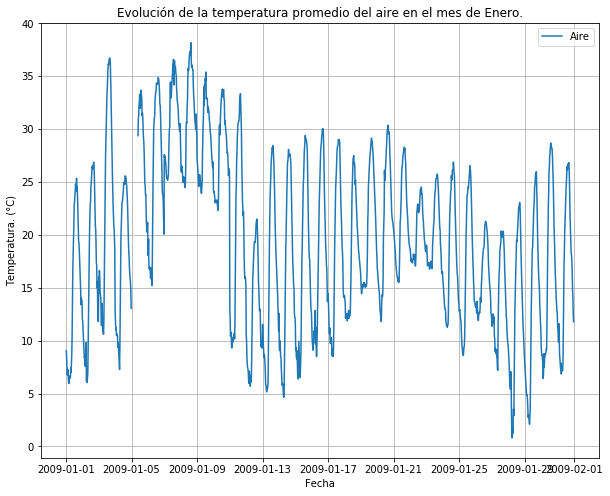

In [32]:
plt.figure(figsize=[10,8])
x=ult['Fecha'] #Le asigno el valor de la fecha a x 
y=ult['airT_Avg'] #temperatura del Aire
plt.plot(x, y) #Grafico x vs y
plt.legend(["Aire"],loc='best') #Agrego una leyenda a la grafica
plt.title("Evolución de la temperatura promedio del aire en el mes de Enero.") #Titulo de la grafica
plt.ylabel("Temperatura. (°C)") #Nombre del eje y
plt.xlabel("Fecha") #Nombre del eje x
plt.grid(True)
plt.savefig('9',plt=2000)
plt.show()

In [33]:
#Ahora usaremos el rolling mean, para suavisar las graficas.
comb2roll=pd.DataFrame(comb2)
comb3roll=pd.DataFrame(comb3)
comb4roll=pd.DataFrame(comb4)
comb5roll=pd.DataFrame(comb5)
comb6roll=pd.DataFrame(comb6)

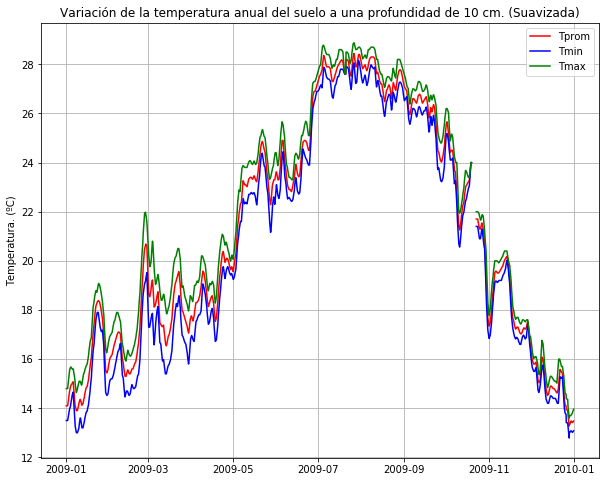

In [34]:
comb2roll['TmaxRoll']=comb2.Tmax.rolling(60, min_periods=1).mean()
comb2roll['TminRoll']=comb2.Tmin.rolling(60, min_periods=1).mean()
comb2roll['TpromRoll']=comb2.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb2.Fecha, y=comb2roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb2.Fecha, y=comb2roll.TminRoll, fmt="b-")
plt.plot_date(x=comb2.Fecha, y=comb2roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la temperatura anual del suelo a una profundidad de 10 cm. (Suavizada)")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.show()

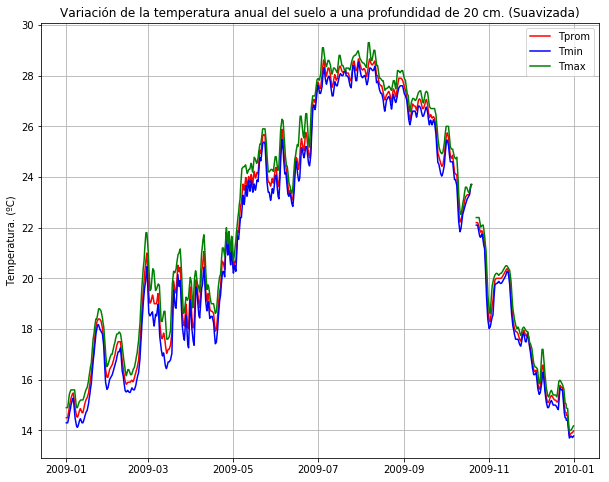

In [35]:
comb3roll['TmaxRoll']=comb3.Tmax.rolling(60, min_periods=1).mean()
comb3roll['TminRoll']=comb3.Tmin.rolling(60, min_periods=1).mean()
comb3roll['TpromRoll']=comb3.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb3.Fecha, y=comb3roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb3.Fecha, y=comb3roll.TminRoll, fmt="b-")
plt.plot_date(x=comb3.Fecha, y=comb3roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la temperatura anual del suelo a una profundidad de 20 cm. (Suavizada)")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.show()

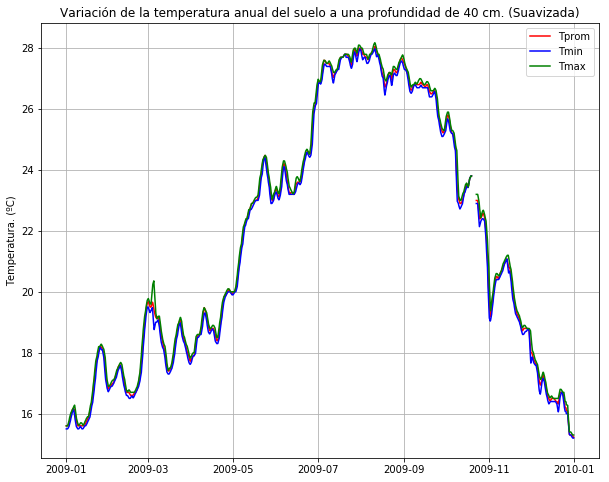

In [36]:
comb4roll['TmaxRoll']=comb4.Tmax.rolling(60, min_periods=1).mean()
comb4roll['TminRoll']=comb4.Tmin.rolling(60, min_periods=1).mean()
comb4roll['TpromRoll']=comb4.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb4.Fecha, y=comb4roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb4.Fecha, y=comb4roll.TminRoll, fmt="b-")
plt.plot_date(x=comb4.Fecha, y=comb4roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la temperatura anual del suelo a una profundidad de 40 cm. (Suavizada)")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.show()

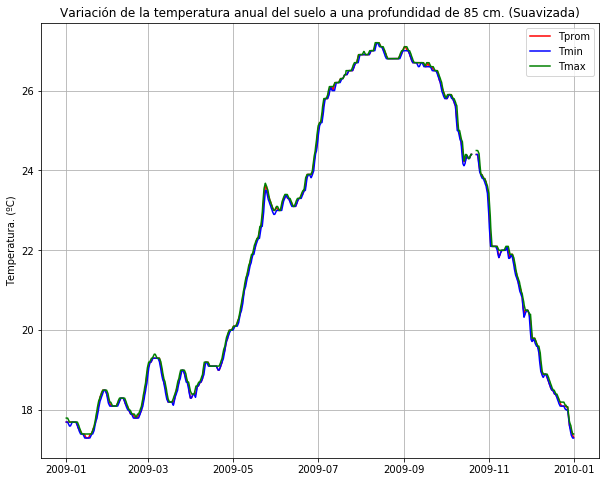

In [37]:
comb5roll['TmaxRoll']=comb5.Tmax.rolling(60, min_periods=1).mean()
comb5roll['TminRoll']=comb5.Tmin.rolling(60, min_periods=1).mean()
comb5roll['TpromRoll']=comb5.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb5.Fecha, y=comb5roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb5.Fecha, y=comb5roll.TminRoll, fmt="b-")
plt.plot_date(x=comb5.Fecha, y=comb5roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la temperatura anual del suelo a una profundidad de 85 cm. (Suavizada)")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.show()

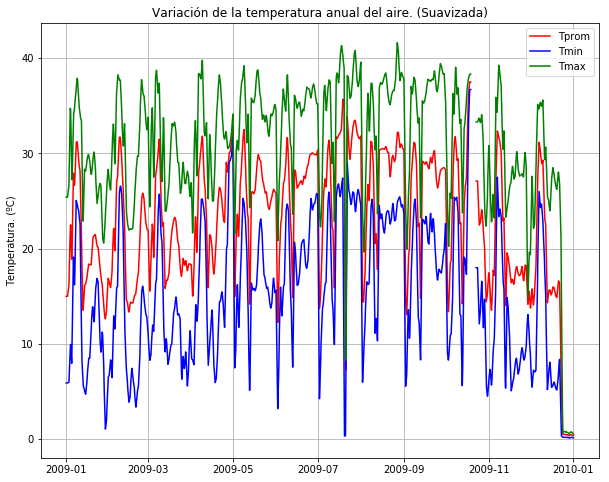

In [38]:
comb6roll['TmaxRoll']=comb6.Tmax.rolling(60, min_periods=1).mean()
comb6roll['TminRoll']=comb6.Tmin.rolling(60, min_periods=1).mean()
comb6roll['TpromRoll']=comb6.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb6.Fecha, y=comb6roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb6.Fecha, y=comb6roll.TminRoll, fmt="b-")
plt.plot_date(x=comb6.Fecha, y=comb6roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la temperatura anual del aire. (Suavizada)")
plt.ylabel("Temperatura. (ºC)")
plt.grid(True)
plt.show()